# Model Building

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from xgboost import XGBClassifier
from sklearn.metrics import ConfusionMatrixDisplay

import pickle
from IPython.display import Markdown, display
from sklearn.preprocessing import StandardScaler

def printmd(string):
    display(Markdown(string))

In [3]:
df = pd.read_excel("Project_Data_Churn.xlsx")
df.head()

,CustomerID,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,tenure,ContentType,MultiDeviceAccess,...,AverageViewingDuration,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,Churn
0,LOHRYYC9E8,42,11.321950,475.521914,Basic,Electronic check,Yes,1,Movies,Yes,...,24.593361,25,Comedy,3.489465,7,Female,15,No,No,0
1,RIH7RFEZCS,95,12.810915,1217.036887,Standard,Electronic check,Yes,34,TV Shows,No,...,102.860795,21,Comedy,2.251860,3,Male,8,No,NaN,0
2,JB5J8X2UY1,6,NaN,91.583304,Standard,Credit card,Yes,2,TV Shows,No,...,10.512415,29,Fantasy,NaN,4,Male,14,No,Yes,1
3,Z4GZJIB90P,54,17.917819,967.562224,Basic,NaN,Yes,45,Movies,No,...,45.246834,45,Drama,1.275004,3,Male,12,No,NaN,0
4,B3BDJTW0L9,27,NaN,339.057244,Basic,Mailed check,No,2,TV Shows,No,...,94.310954,44,Comedy,3.236230,4,Female,18,No,NaN,0


In [4]:
printmd(f"There are **{df.shape[0]}** rows,  **{df.shape[1]}** columns in the dataset")

There are **963** rows,  **22** columns in the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 963 entries, 0 to 962
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                963 non-null    object 
 1   AccountAge                963 non-null    int64  
 2   MonthlyCharges            759 non-null    float64
 3   TotalCharges              777 non-null    float64
 4   SubscriptionType          913 non-null    object 
 5   PaymentMethod             740 non-null    object 
 6   PaperlessBilling          963 non-null    object 
 7   tenure                    963 non-null    int64  
 8   ContentType               963 non-null    object 
 9   MultiDeviceAccess         963 non-null    object 
 10  DeviceRegistered          887 non-null    object 
 11  ViewingHoursPerWeek       963 non-null    float64
 12  AverageViewingDuration    963 non-null    float64
 13  ContentDownloadsPerMonth  963 non-null    int64  
 14  GenrePrefe

In [6]:
df.columns

Index(['CustomerID', 'AccountAge', 'MonthlyCharges', 'TotalCharges',
       'SubscriptionType', 'PaymentMethod', 'PaperlessBilling', 'tenure',
       'ContentType', 'MultiDeviceAccess', 'DeviceRegistered',
       'ViewingHoursPerWeek', 'AverageViewingDuration',
       'ContentDownloadsPerMonth', 'GenrePreference', 'UserRating',
       'SupportTicketsPerMonth', 'Gender', 'WatchlistSize', 'ParentalControl',
       'SubtitlesEnabled', 'Churn'],
      dtype='object')

In [7]:
df.describe()

,AccountAge,MonthlyCharges,TotalCharges,tenure,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,WatchlistSize,Churn
count,963.000000,759.000000,777.000000,963.000000,963.000000,963.000000,963.000000,702.000000,963.000000,963.000000,963.000000
mean,57.515057,12.328262,714.052121,32.289720,21.029241,90.741877,24.694704,2.923945,4.455867,11.900312,0.175493
std,33.662575,4.260861,511.071322,24.853545,11.318164,49.923719,14.319572,1.165992,2.935706,7.117402,0.380586
min,1.000000,5.062339,11.582882,0.000000,0.315317,5.028412,0.000000,1.000181,0.000000,0.000000,0.000000
25%,29.000000,8.816669,318.425396,8.000000,11.621961,47.777701,13.000000,1.922235,2.000000,6.000000,0.000000
50%,55.000000,12.169888,614.196606,29.000000,21.334100,89.878241,25.000000,2.898328,5.000000,12.000000,0.000000
75%,86.000000,15.937606,1021.436452,56.000000,30.419851,134.353824,37.000000,3.953953,7.000000,18.000000,0.000000
max,119.000000,19.932542,2261.019201,72.000000,39.949086,179.752024,49.000000,4.997348,9.000000,24.000000,1.000000


In [8]:
df.describe()

,AccountAge,MonthlyCharges,TotalCharges,tenure,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,WatchlistSize,Churn
count,963.000000,759.000000,777.000000,963.000000,963.000000,963.000000,963.000000,702.000000,963.000000,963.000000,963.000000
mean,57.515057,12.328262,714.052121,32.289720,21.029241,90.741877,24.694704,2.923945,4.455867,11.900312,0.175493
std,33.662575,4.260861,511.071322,24.853545,11.318164,49.923719,14.319572,1.165992,2.935706,7.117402,0.380586
min,1.000000,5.062339,11.582882,0.000000,0.315317,5.028412,0.000000,1.000181,0.000000,0.000000,0.000000
25%,29.000000,8.816669,318.425396,8.000000,11.621961,47.777701,13.000000,1.922235,2.000000,6.000000,0.000000
50%,55.000000,12.169888,614.196606,29.000000,21.334100,89.878241,25.000000,2.898328,5.000000,12.000000,0.000000
75%,86.000000,15.937606,1021.436452,56.000000,30.419851,134.353824,37.000000,3.953953,7.000000,18.000000,0.000000
max,119.000000,19.932542,2261.019201,72.000000,39.949086,179.752024,49.000000,4.997348,9.000000,24.000000,1.000000


In [9]:
df.describe(include=['object']).T

,count,unique,top,freq
CustomerID,963,963,LOHRYYC9E8,1
SubscriptionType,913,3,Premium,333
PaymentMethod,740,4,Credit card,245
PaperlessBilling,963,2,No,506
ContentType,963,3,Both,349
MultiDeviceAccess,963,2,No,497
DeviceRegistered,887,4,Mobile,278
GenrePreference,853,5,Comedy,196
Gender,923,2,Male,541
ParentalControl,963,2,No,563


In [10]:
df.isnull().sum()

CustomerID                    0
AccountAge                    0
MonthlyCharges              204
TotalCharges                186
SubscriptionType             50
PaymentMethod               223
PaperlessBilling              0
tenure                        0
ContentType                   0
MultiDeviceAccess             0
DeviceRegistered             76
ViewingHoursPerWeek           0
AverageViewingDuration        0
ContentDownloadsPerMonth      0
GenrePreference             110
UserRating                  261
SupportTicketsPerMonth        0
Gender                       40
WatchlistSize                 0
ParentalControl               0
SubtitlesEnabled            800
Churn                         0
dtype: int64

In [11]:
numerical_features = ['MonthlyCharges', 'TotalCharges', 'UserRating', 'tenure']
categorical_features = ['SubscriptionType', 'PaymentMethod', 'DeviceRegistered', 'GenrePreference', 'Gender']

for col in numerical_features:
    if col in df.columns:
        df[col].fillna(df[col].mean(), inplace=True)

for col in categorical_features:
    if col in df.columns:
        df[col].fillna(df[col].mode()[0], inplace=True)
        
print("Remaining missing values in each column:\n")
print(df.isnull().sum())

Remaining missing values in each column:

CustomerID                    0
AccountAge                    0
MonthlyCharges                0
TotalCharges                  0
SubscriptionType              0
PaymentMethod                 0
PaperlessBilling              0
tenure                        0
ContentType                   0
MultiDeviceAccess             0
DeviceRegistered              0
ViewingHoursPerWeek           0
AverageViewingDuration        0
ContentDownloadsPerMonth      0
GenrePreference               0
UserRating                    0
SupportTicketsPerMonth        0
Gender                        0
WatchlistSize                 0
ParentalControl               0
SubtitlesEnabled            800
Churn                         0
dtype: int64


C:\Users\susmi\AppData\Local\Temp\ipykernel_10596\3389138833.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
C:\Users\susmi\AppData\Local\Temp\ipykernel_10596\3389138833.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

In [12]:
df.drop(['CustomerID', 'SubtitlesEnabled'], axis=1, inplace=True)

In [13]:
print(df.isnull().sum())

AccountAge                  0
MonthlyCharges              0
TotalCharges                0
SubscriptionType            0
PaymentMethod               0
PaperlessBilling            0
tenure                      0
ContentType                 0
MultiDeviceAccess           0
DeviceRegistered            0
ViewingHoursPerWeek         0
AverageViewingDuration      0
ContentDownloadsPerMonth    0
GenrePreference             0
UserRating                  0
SupportTicketsPerMonth      0
Gender                      0
WatchlistSize               0
ParentalControl             0
Churn                       0
dtype: int64


In [14]:
print(df["Churn"].value_counts())

Churn
0    794
1    169
Name: count, dtype: int64


In [15]:
df.head()

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,tenure,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,Churn
0,42,11.321950,475.521914,Basic,Electronic check,Yes,1,Movies,Yes,Tablet,0.386852,24.593361,25,Comedy,3.489465,7,Female,15,No,0
1,95,12.810915,1217.036887,Standard,Electronic check,Yes,34,TV Shows,No,Mobile,37.123000,102.860795,21,Comedy,2.251860,3,Male,8,No,0
2,6,12.328262,91.583304,Standard,Credit card,Yes,2,TV Shows,No,Tablet,30.716944,10.512415,29,Fantasy,2.923945,4,Male,14,No,1
3,54,17.917819,967.562224,Basic,Credit card,Yes,45,Movies,No,Mobile,2.495373,45.246834,45,Drama,1.275004,3,Male,12,No,0
4,27,12.328262,339.057244,Basic,Mailed check,No,2,TV Shows,No,Mobile,39.936910,94.310954,44,Comedy,3.236230,4,Female,18,No,0


In [16]:
df.head()

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,tenure,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,Churn
0,42,11.321950,475.521914,Basic,Electronic check,Yes,1,Movies,Yes,Tablet,0.386852,24.593361,25,Comedy,3.489465,7,Female,15,No,0
1,95,12.810915,1217.036887,Standard,Electronic check,Yes,34,TV Shows,No,Mobile,37.123000,102.860795,21,Comedy,2.251860,3,Male,8,No,0
2,6,12.328262,91.583304,Standard,Credit card,Yes,2,TV Shows,No,Tablet,30.716944,10.512415,29,Fantasy,2.923945,4,Male,14,No,1
3,54,17.917819,967.562224,Basic,Credit card,Yes,45,Movies,No,Mobile,2.495373,45.246834,45,Drama,1.275004,3,Male,12,No,0
4,27,12.328262,339.057244,Basic,Mailed check,No,2,TV Shows,No,Mobile,39.936910,94.310954,44,Comedy,3.236230,4,Female,18,No,0


### Label encoding of categorical fetaures

In [18]:
object_columns = df.select_dtypes(include="object").columns

In [19]:
print(object_columns)

Index(['SubscriptionType', 'PaymentMethod', 'PaperlessBilling', 'ContentType',
       'MultiDeviceAccess', 'DeviceRegistered', 'GenrePreference', 'Gender',
       'ParentalControl'],
      dtype='object')


In [20]:
encoders = {}

# apply label encoding and store the encoders
for column in object_columns:
  label_encoder = LabelEncoder()
  df[column] = label_encoder.fit_transform(df[column])
  encoders[column] = label_encoder


# save the encoders to a pickle file
with open("encoders.pkl", "wb") as f:
  pickle.dump(encoders, f)


In [21]:
encoders

{'SubscriptionType': LabelEncoder(),
 'PaymentMethod': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'ContentType': LabelEncoder(),
 'MultiDeviceAccess': LabelEncoder(),
 'DeviceRegistered': LabelEncoder(),
 'GenrePreference': LabelEncoder(),
 'Gender': LabelEncoder(),
 'ParentalControl': LabelEncoder()}

In [22]:
df.head()

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,tenure,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,Churn
0,42,11.321950,475.521914,0,2,1,1,1,1,3,0.386852,24.593361,25,1,3.489465,7,0,15,0,0
1,95,12.810915,1217.036887,2,2,1,34,2,0,1,37.123000,102.860795,21,1,2.251860,3,1,8,0,0
2,6,12.328262,91.583304,2,1,1,2,2,0,3,30.716944,10.512415,29,3,2.923945,4,1,14,0,1
3,54,17.917819,967.562224,0,1,1,45,1,0,1,2.495373,45.246834,45,2,1.275004,3,1,12,0,0
4,27,12.328262,339.057244,0,3,0,2,2,0,1,39.936910,94.310954,44,1,3.236230,4,0,18,0,0


In [23]:
x_1 = df.drop(columns=["Churn"])
#print(x)
scaler = StandardScaler().fit(x_1)

In [24]:
scaled_features = scaler.transform(x_1)

In [25]:
x = scaled_features
y = df["Churn"]

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [27]:
print(y_train.shape)

(770,)


In [28]:
print(y_train.value_counts())

Churn
0    641
1    129
Name: count, dtype: int64


# Probit Regression

In [30]:
x = sm.add_constant(x)

# Step 4: Fit Probit model
probit_model = sm.Probit(y, x)
result = probit_model.fit()

# Step 5: Summary of the model
print(result.summary())

# Optional: Predict probabilities and classes
y_pred_prob = result.predict(x)
y_pred_class = (y_pred_prob > 0.5).astype(int)

# Evaluate accuracy
print("Accuracy:", accuracy_score(y, y_pred_class))

Optimization terminated successfully.
         Current function value: 0.390910
         Iterations 6
                          Probit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                  963
Model:                         Probit   Df Residuals:                      943
Method:                           MLE   Df Model:                           19
Date:                Tue, 22 Jul 2025   Pseudo R-squ.:                  0.1584
Time:                        14:32:18   Log-Likelihood:                -376.45
converged:                       True   LL-Null:                       -447.30
Covariance Type:            nonrobust   LLR p-value:                 8.575e-21
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.1111      0.058    -19.226      0.000      -1.224      -0.998
x1            -0.3750      0.

# Random Forest

In [32]:
# Initialize and train the model
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(x_train, y_train)

# Predict on test data
y_pred_RF = random_forest.predict(x_test)

# Evaluate
print("Random Forest Performance")
print("Accuracy:", accuracy_score(y_test, y_pred_RF))
print(classification_report(y_test, y_pred_RF))

Random Forest Performance
Accuracy: 0.8290155440414507
              precision    recall  f1-score   support

           0       0.82      1.00      0.90       153
           1       1.00      0.17      0.30        40

    accuracy                           0.83       193
   macro avg       0.91      0.59      0.60       193
weighted avg       0.86      0.83      0.78       193



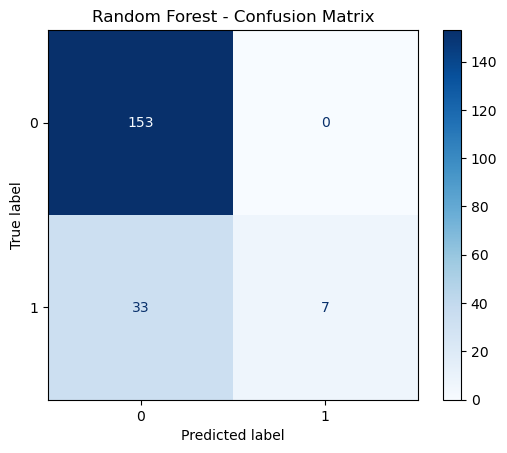

In [33]:
ConfusionMatrixDisplay.from_estimator(random_forest, x_test, y_test, cmap='Blues')
plt.title('Random Forest - Confusion Matrix')
plt.show()

# Gradient Boosting

In [35]:
gradient_boost = XGBClassifier()
gradient_boost.fit(x_train, y_train)

# Predict on test data
y_pred_GB = gradient_boost.predict(x_test)

# Evaluate
print("Gradient Boosting Performance")
print("Accuracy:", accuracy_score(y_test, y_pred_GB))
print(classification_report(y_test, y_pred_GB))

Gradient Boosting Performance
Accuracy: 0.8134715025906736
              precision    recall  f1-score   support

           0       0.83      0.96      0.89       153
           1       0.62      0.25      0.36        40

    accuracy                           0.81       193
   macro avg       0.73      0.61      0.62       193
weighted avg       0.79      0.81      0.78       193



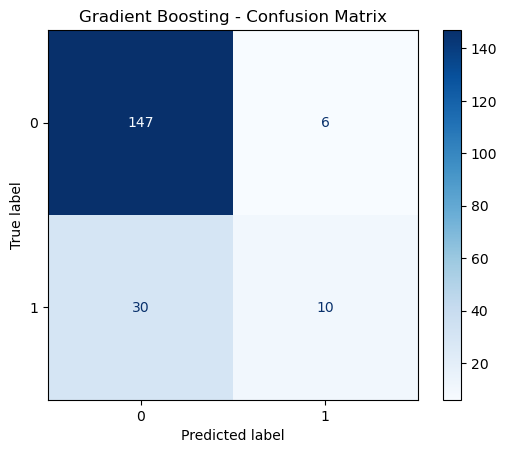

In [36]:
ConfusionMatrixDisplay.from_estimator(gradient_boost, x_test, y_test, cmap='Blues')
plt.title('Gradient Boosting - Confusion Matrix')
plt.show()

# Compare Performance

In [38]:
results = {
    "Model": ["Probit Regression", "Random Forest", "Gradient Boosting"],
    "Accuracy": [
        accuracy_score(y, y_pred_class),
        accuracy_score(y_test, y_pred_RF),
        accuracy_score(y_test, y_pred_GB)
    ]
}

# Convert to a DataFrame
results_df = pd.DataFrame(results)
print(results_df)

               Model  Accuracy
0  Probit Regression  0.842160
1      Random Forest  0.829016
2  Gradient Boosting  0.813472
